<a href="https://colab.research.google.com/github/Ankur2024/Random-Forest-ML/blob/main/RandomForest_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_features=6, n_informative=5, n_redundant=0, n_clusters_per_class=1)

In [3]:
data = pd.DataFrame(X, columns = ['col1','col2','col3','col4','col5','col6'])
data['target'] = y
print(data.shape)
data.head()

(100, 7)


,col1,col2,col3,col4,col5,col6,target
0,1.861302,0.456030,1.097507,-1.884468,2.025539,-0.652860,0
1,-1.677837,1.642769,-2.053255,1.332836,-1.249606,2.082899,1
2,-2.507524,0.996927,-0.241591,-0.931111,-1.369626,0.711238,0
3,-1.097599,2.840158,-0.863626,0.587386,-5.099391,3.504077,1
4,-4.627670,2.813161,0.293288,-0.506201,-0.932078,0.915958,1


In [4]:
def sample_rows(data, percent):
    n_samples = int(percent * data.shape[0])
    return data.sample(n=n_samples, replace=True)

In [5]:
def sample_features(data, percent):
    feature_columns = data.columns.tolist()[:-1]
    num_columns_to_sample = int(percent * len(feature_columns))
    sampled_columns = random.sample(feature_columns, num_columns_to_sample)
    return data[sampled_columns + ['target']]

In [6]:
def combined_sampling(data, row_percent, col_percent):
  new_data = sample_rows(data, row_percent)
  return sample_features(new_data, col_percent)

In [7]:
data1=sample_rows(data, 0.1)
data1

,col1,col2,col3,col4,col5,col6,target
50,-2.285060,1.541864,-0.114779,-0.452192,-3.461590,0.871387,1
4,-4.627670,2.813161,0.293288,-0.506201,-0.932078,0.915958,1
60,-0.832632,-0.018190,0.319322,-1.568196,-0.711263,0.015062,0
7,0.228199,0.095892,0.293023,1.834440,2.179383,-0.246099,1
6,3.114666,-2.105000,-0.669075,-0.540583,1.930569,-2.137667,0
5,2.120392,-1.101983,-0.096293,-1.496053,1.482004,-1.273161,0
14,-1.355549,1.096371,-0.922023,-1.570230,0.867269,-0.155287,0
81,-0.700404,-0.184578,-0.557625,1.707054,1.102255,0.436609,1
73,-2.851824,-0.025429,0.361989,0.387722,-0.119479,0.258333,0
16,1.886081,-0.869946,1.282295,-1.882623,0.792714,-0.969673,0


In [8]:
data2 = sample_rows(data, 0.1)
data2

,col1,col2,col3,col4,col5,col6,target
54,-4.424540,2.413982,1.897503,-2.006575,-0.967629,-1.274723,1
74,0.603926,-1.672981,0.634506,-0.809621,0.093851,-2.698749,0
20,3.324575,-2.429158,1.235854,-1.162438,1.798314,-1.504579,0
4,-4.627670,2.813161,0.293288,-0.506201,-0.932078,0.915958,1
74,0.603926,-1.672981,0.634506,-0.809621,0.093851,-2.698749,0
20,3.324575,-2.429158,1.235854,-1.162438,1.798314,-1.504579,0
35,3.069989,0.289931,-0.266793,1.784104,-1.941412,0.680114,1
6,3.114666,-2.105000,-0.669075,-0.540583,1.930569,-2.137667,0
73,-2.851824,-0.025429,0.361989,0.387722,-0.119479,0.258333,0
72,0.712341,-1.062138,1.586351,-0.951463,1.099429,-0.917277,0


In [9]:
data3 = sample_rows(data, 0.1)
data3

,col1,col2,col3,col4,col5,col6,target
45,0.803153,-0.035797,0.782828,0.301994,0.031050,-1.813895,1
97,-4.478208,1.532982,-0.370677,-1.590887,0.999210,2.642086,0
29,0.369872,1.314693,-0.100499,1.604592,-1.656167,1.859286,1
28,2.467329,-1.266021,1.864817,-0.528940,1.777076,-0.698176,0
59,-1.724920,0.419859,0.055379,0.484752,-1.757653,0.578843,1
5,2.120392,-1.101983,-0.096293,-1.496053,1.482004,-1.273161,0
85,3.111671,-3.226133,-0.327605,0.479773,0.587843,-2.093556,0
55,0.996147,-1.787786,-1.634676,-0.621938,2.109929,-0.702406,0
21,-1.432797,1.162020,-0.269040,0.207133,-1.902365,0.475496,1
4,-4.627670,2.813161,0.293288,-0.506201,-0.932078,0.915958,1


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [11]:
clf1.fit(data1.iloc[:,0:6], data1.iloc[:,-1])
clf2.fit(data2.iloc[:,0:6], data2.iloc[:,-1])
clf3.fit(data3.iloc[:,0:6], data3.iloc[:,-1])

DecisionTreeClassifier()

In [12]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[3] <= -0.523\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.5, 'x[2] <= 0.328\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

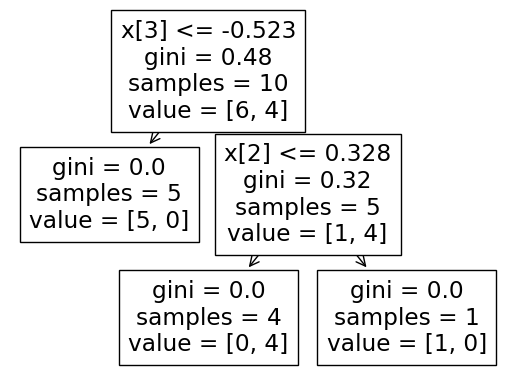

In [13]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[4] <= -0.526\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

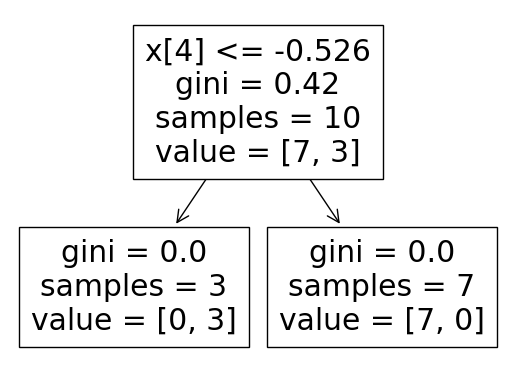

In [14]:
plot_tree(clf2)


[Text(0.5, 0.75, 'x[4] <= 0.309\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

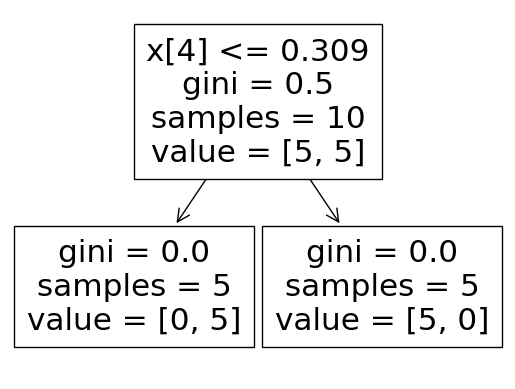

In [15]:
plot_tree(clf3)

In [16]:
clf1.predict(np.array([-0.224808, 2.080477,	0.492617,	2.944989,	-1.059119,	1.728074]).reshape(1,6))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [17]:
clf2.predict(np.array([-0.224808, 2.080477,	0.492617,	2.944989,	-1.059119,	1.728074]).reshape(1,6))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
clf3.predict(np.array([-0.224808, 2.080477,	0.492617,	2.944989,	-1.059119,	1.728074]).reshape(1,6))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])